In [1]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
from importlib import reload
import pickle

In [4]:
with open("bsDoctor-report/data.pickle", 'rb') as fd:
    data = pickle.load(fd)

In [5]:
import bsDoctor
reload(bsDoctor)
import src.utils
reload(src.utils)

<module 'src.utils' from '/root/bsDoctor/src/utils.py'>

In [6]:
from jinja2 import Environment,FileSystemLoader

In [7]:
env = Environment(loader=FileSystemLoader('report/'))
env.globals["include_file"] = src.utils.include_file
# template = env.get_template('base.html')   
template = env.get_template('main.jinja-html')
temp_out = template.render(alldata=data)   

with open('bsDoctor-report/sample-3.html', 'w', encoding='utf-8') as f:
    f.writelines(temp_out)

In [18]:
data['include_motif']

KeyError: 'include_motif'

In [22]:
x = np.random.randn(10)
y = np.random.randn(10)

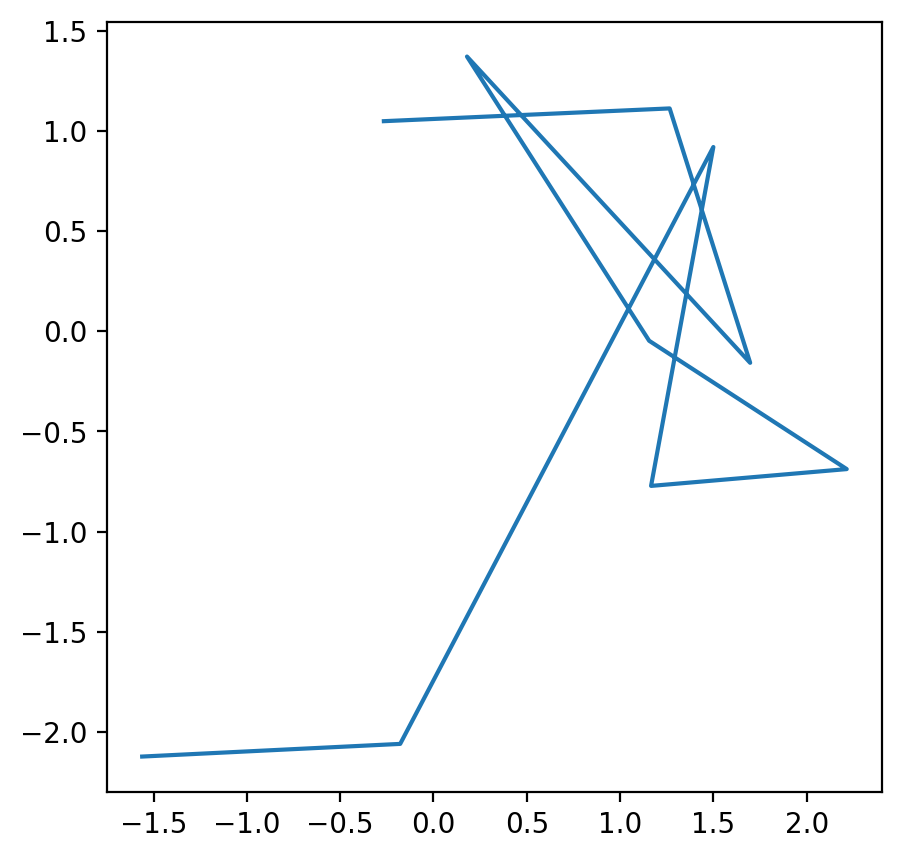

In [25]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 5))
fig.subplots_adjust(hspace=0)
axs = [axs]
axs[0].plot(x, y)